In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# tạo hàm convert gray
def convert_to_grayscale(image):
    # Convert the color image to grayscale using OpenCV
    grayscale_image = image.copy()
    if len(image.shape) > 2:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [3]:
#tạo hàm đọc ảnh, trả ra image và template
def read_image_template(image_name, template_name):
    image = cv2.imread(image_name)
    template = cv2.imread(template_name)

    return image, template

In [4]:
def scale_image(image, ratio):
    h, w = image.shape[:2]
    new_image = cv2.resize(image, (int(w*ratio), int(h*ratio)), interpolation=cv2.INTER_AREA if ratio < 1 else cv2.INTER_LINEAR)
    return new_image

In [5]:
def show_image(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.axis('off')
    plt.imshow(new_image)

In [6]:
def compare_size_2image(image1, image2):
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]
    if h1 <= h2 and w1 <= w2:
        return 0
    elif h1 > h2 and w1 > w2:
        return 1
    else:
        return 2

In [7]:
def detections(orginalimage, image, template):
    # image_gray = convert_to_grayscale(image)
    # template_gray = convert_to_grayscale(template)

    
    detected_image = np.copy(orginalimage)
    
    best_detection = None
    score = 0

    for r in np.linspace(0.5,2,31):
        new_template = scale_image(template, r)
        
        cs2i = compare_size_2image(new_template, image)
        if cs2i == 0:
            corr = cv2.matchTemplate(image, new_template, method=cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(corr)

            h, w = new_template.shape[:2]
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)

            if max_val > score:
                best_detection = (top_left, bottom_right)
                score = max_val

    top_left, bottom_right = best_detection
    cv2.rectangle(detected_image, top_left, bottom_right, (0, 255, 0), 2)
        
    detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
    # plt.axis('off')
    # plt.imshow(detected_image)
    return detected_image

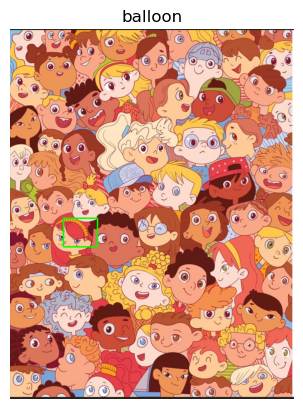

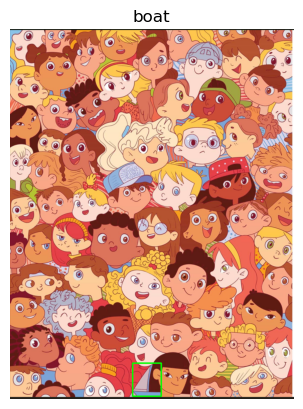

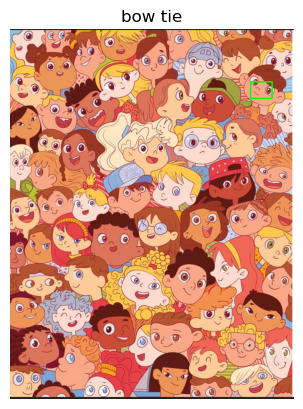

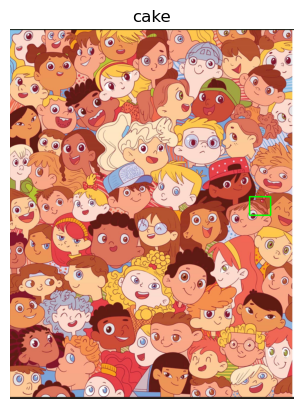

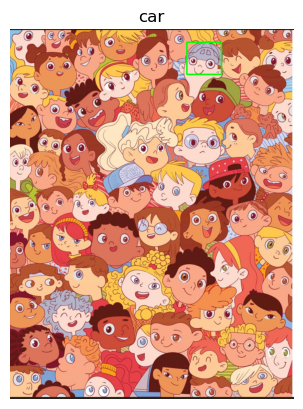

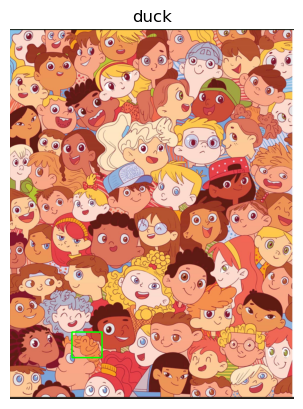

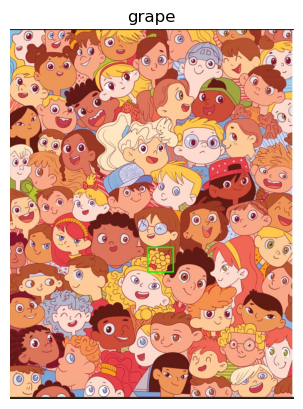

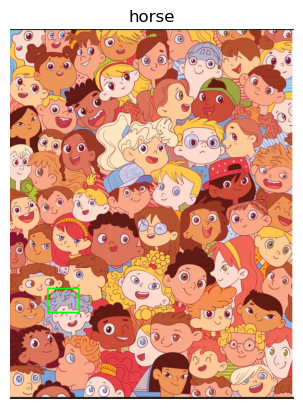

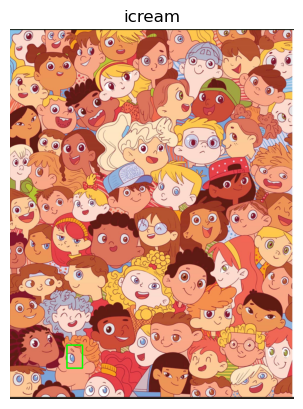

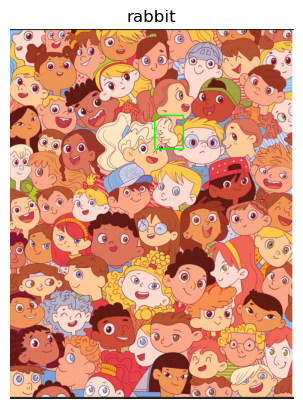

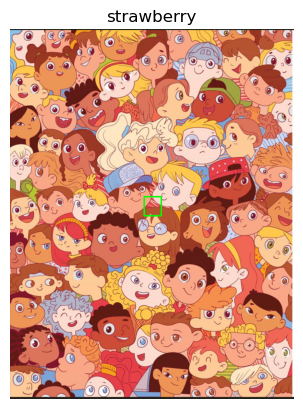

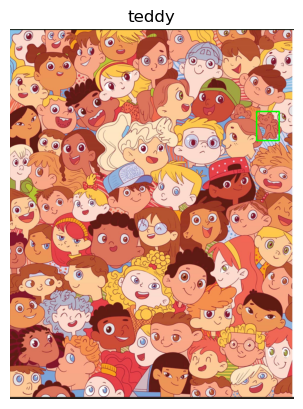

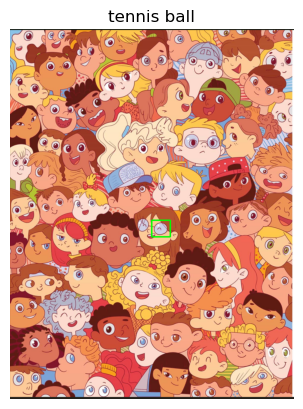

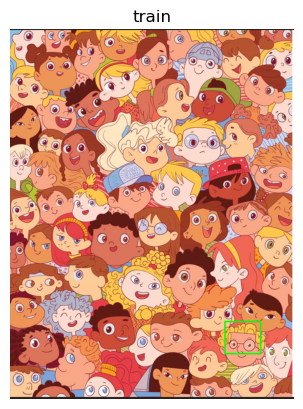

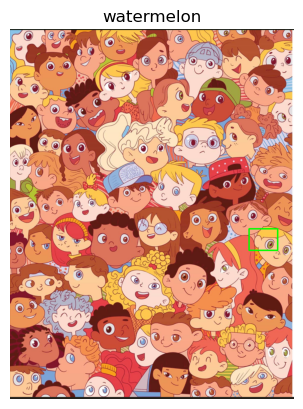

In [22]:
templates_name = ["balloon", "boat", "bow tie", "cake", "car", "duck", "grape", "horse", "icream", \
                  "rabbit", "strawberry", "teddy", "tennis ball", "train", "watermelon"]

for i, tn in enumerate(templates_name):
    image_name = "find1/image.png"
    template_name = f"find1/templates/{tn}.png"

    image, template = read_image_template(image_name, template_name)


    image_gray = convert_to_grayscale(image)
    template_gray = convert_to_grayscale(template)
    edge_image = cv2.Canny(image_gray, 50, 150)
    edge_template = cv2.Canny(template_gray, 50, 150)


    detec = detections(image, edge_image, edge_template)
    
    plt.figure()
    plt.axis('off')
    plt.imshow(detec)
    plt.title(tn)
# phát hiện đúng: 10/15

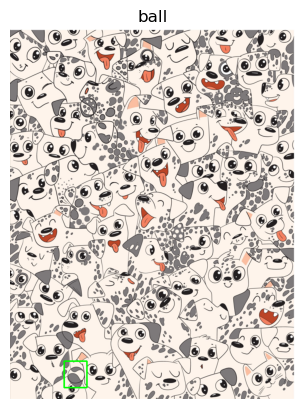

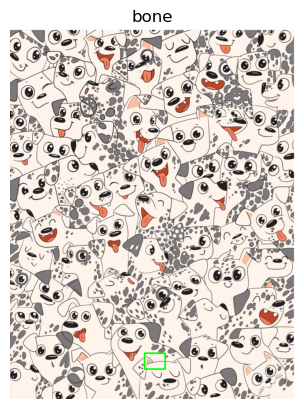

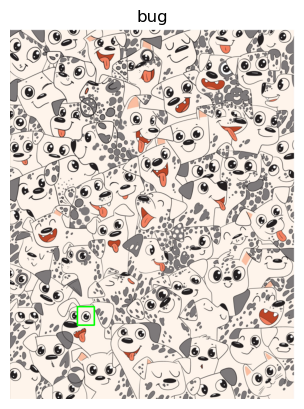

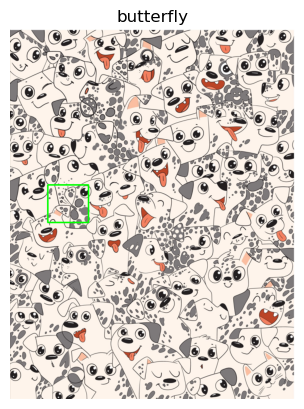

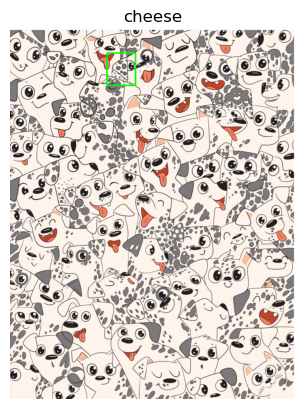

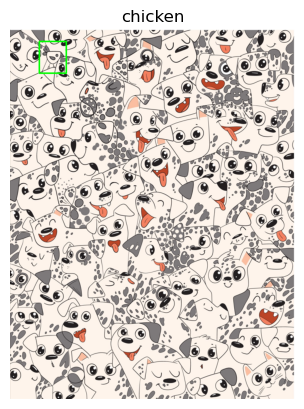

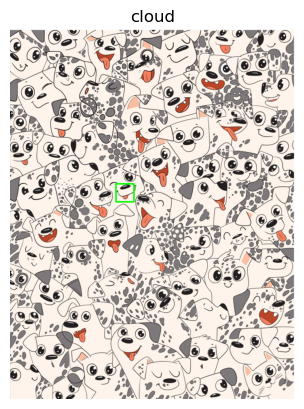

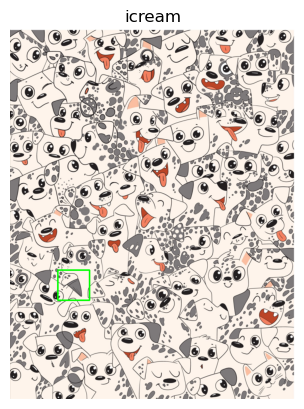

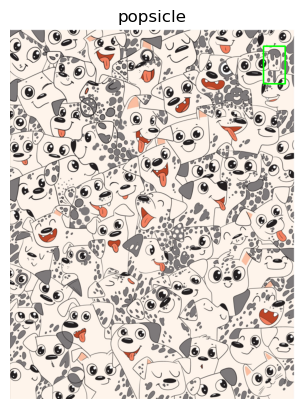

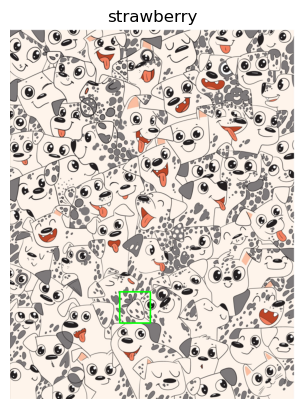

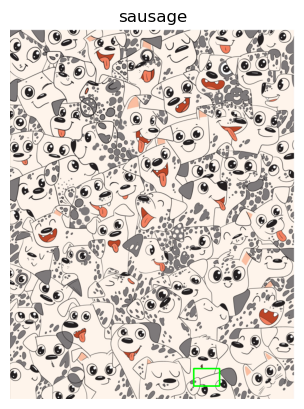

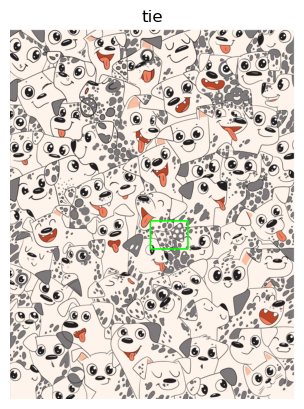

In [23]:
templates_name = ["ball", "bone", "bug", "butterfly", "cheese", "chicken", "cloud", "icream", \
                  "popsicle", "strawberry", "sausage", "tie"]

for i, tn in enumerate(templates_name):
    image_name = "find2/image.png"
    template_name = f"find2/templates/{tn}.png"

    image, template = read_image_template(image_name, template_name)


    image_gray = convert_to_grayscale(image)
    template_gray = convert_to_grayscale(template)
    edge_image = cv2.Canny(image_gray, 50, 150)
    edge_template = cv2.Canny(template_gray, 50, 150)


    detec = detections(image, edge_image, edge_template)
    
    plt.figure()
    plt.axis('off')
    plt.imshow(detec)
    plt.title(tn)
# phát hiện đúng: 8/12